# **`Big Sales Prediction using Random Forest Regressor`**


# **Import** **Library**

In [88]:
import pandas as pd

In [89]:
import numpy as np

# **Import CSV as Dataframe**

In [90]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv')

# **Get the First Five Rows of Dataframe**

In [91]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


# **Get Information of Data Frame**

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# **Get columns Names**

In [93]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# **Get Summary Statistics**

In [94]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


# **Get Missing Values Compete**

In [95]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [97]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


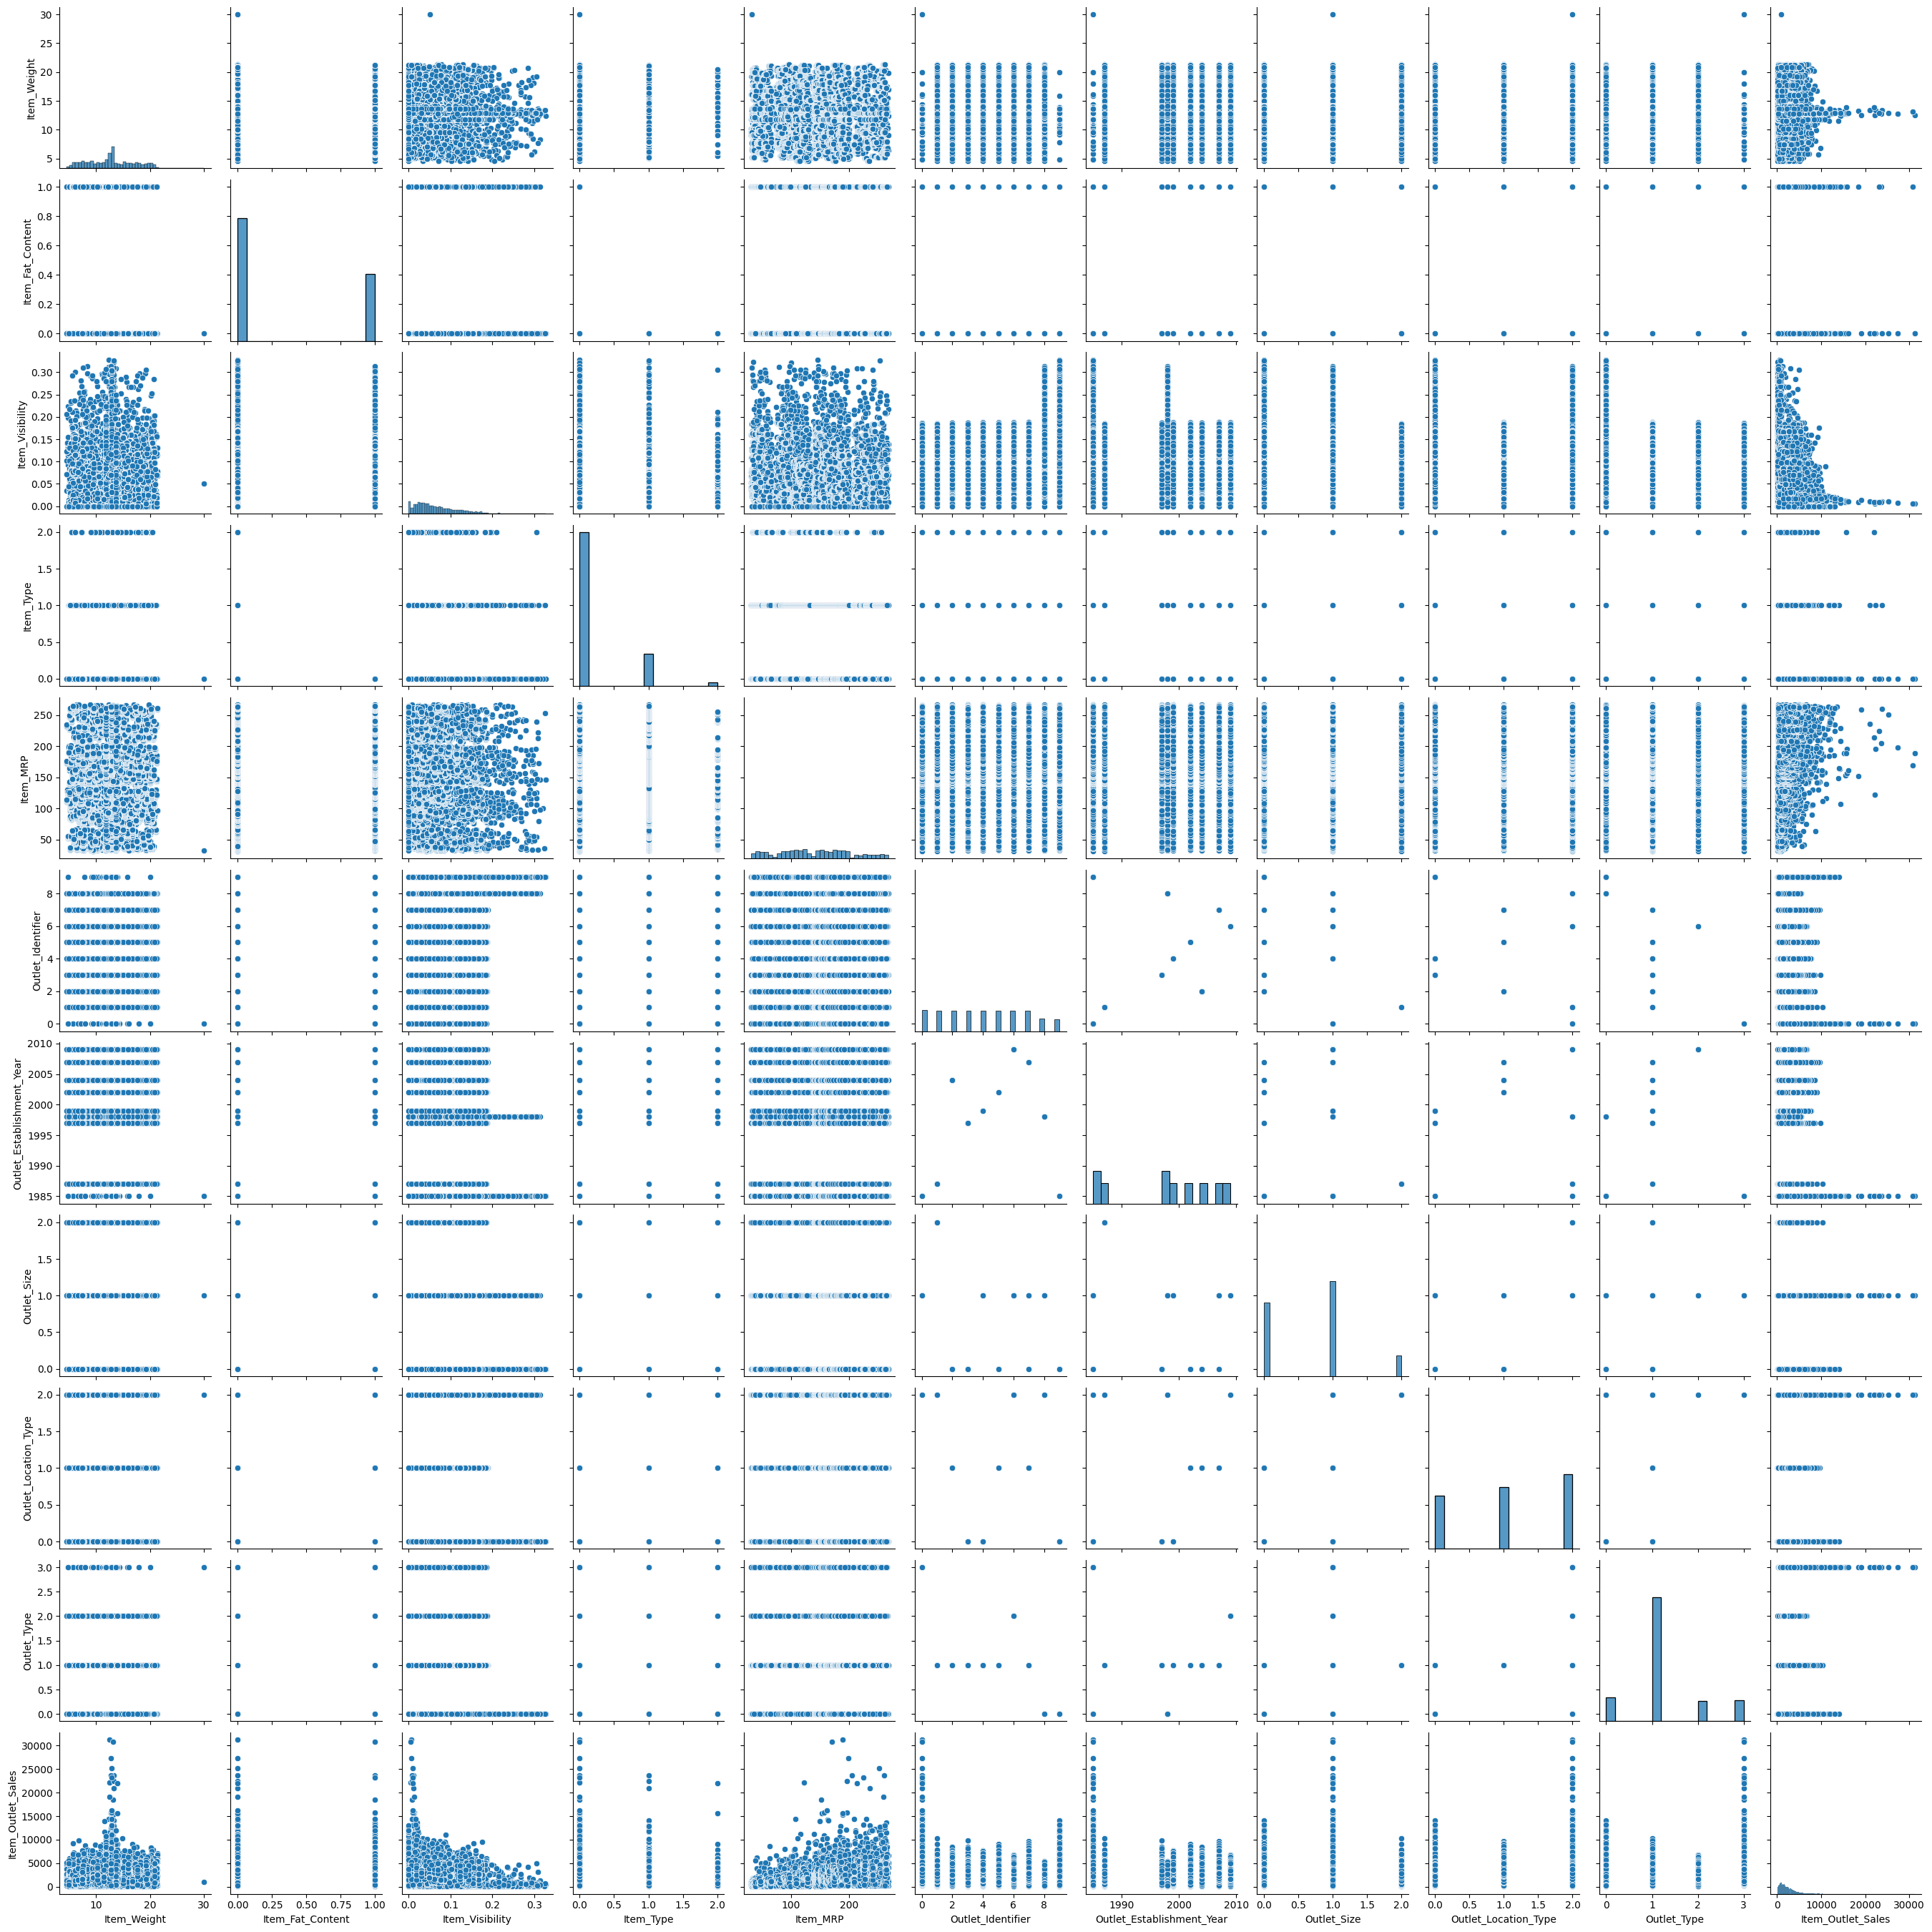

In [155]:
import seaborn as sns
sns.pairplot(df)

# **Get Categorical and Count of Categorical Variables**

In [146]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [156]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [157]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [158]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [159]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [160]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [161]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,
                         'Frozen Foods':0,'Dairy':0,'Baking Goods':0,'Canned':0,'Health and Hygiene':1,
                         'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,
                         'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0}},inplace=True)

In [162]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [163]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [ ]:
df.replace({'Outlet_Identifier':{'OUT027': 0,
'OUT013': 1,
'OUT035': 2,
'OUT046': 3,
'OUT049': 4,
'OUT045': 5,
'OUT018': 6,
'OUT017': 7,
'OUT010': 8,
'OUT019':9 }},inplace=True)

In [164]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [165]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [ ]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)

In [166]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [167]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [168]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)

In [169]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [170]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
dtype: int64

In [171]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)

In [172]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
dtype: int64

In [173]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


# **Get Shape of DataFrame**

In [ ]:
df.shape

# **Define y (dependent or label or target variable) and X(independent or feature or attribute Variable)**

In [175]:
y=df['Item_Outlet_Sales']

In [176]:
y.shape

(14204,)

In [177]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [ ]:
x = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',
        'Outlet_Location_Type','Outlet_Type']]

In [178]:
x=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [179]:
x.shape

(14204, 10)

In [180]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,4,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,2,2004,0,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,1,2,3


# **Get X Variable Standardized**

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
sc = StandardScaler()

In [183]:
x_std = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [184]:
x_std = sc.fit_transform(x_std)

In [185]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [186]:
x[['Item_Weight','Item_Visibility','Item_MRP','Out;let_Establishment_Year']]=pd.DataFrame(x_std,columns=[['Item_Weight','Item_Visibility','Item_MRP','Out;let_Establishment_Year']])

In [187]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Out;let_Establishment_Year
0,-0.115417,0,0.884136,0,-1.731787,4,1999,1,0,1,0.139681
1,-0.115417,0,0.893006,0,-1.723734,7,2007,1,1,1,1.095319
2,-0.115417,0,0.889583,0,-1.723734,6,2009,1,2,2,1.334228
3,-0.115417,0,-1.281712,0,-1.717291,9,1985,0,0,0,-1.532686
4,-0.703509,1,-0.397031,0,-1.706016,7,2007,1,1,1,1.095319
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,2,2004,0,1,1,0.736955
14200,0.002201,0,0.078898,0,1.962160,7,2007,1,1,1,1.095319
14201,0.002201,0,0.070120,0,1.965381,1,1987,2,2,1,-1.293777
14202,0.204448,0,0.064694,0,1.973435,0,1985,1,2,3,-1.532686


# **Get Train Test Split**

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2529)

In [190]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12783, 11), (1421, 11), (12783,), (1421,))

# **Get Model Train**

In [191]:
from sklearn.ensemble import RandomForestRegressor

In [192]:
rfr = RandomForestRegressor(random_state=2529)

In [193]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=2529)

# **Get Model Prediction**

In [142]:
y_pred=rfr.predict(x_test)

In [143]:
y_pred.shape

(1421,)

In [144]:
y_pred

array([1452.89316575,  747.67428518, 1891.26587125, ..., 2216.00678879,
       3407.02742762,  418.04266882])

# **Get Model Evaluation**

In [148]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [149]:
mean_squared_error(y_test,y_pred)

1627919.6245027264

In [150]:
mean_absolute_error(y_test,y_pred)

828.2106413462343

In [152]:
r2_score(y_test,y_pred)

0.5762766918691137

# **Get Visualization of Actual Vs Predicted Results**

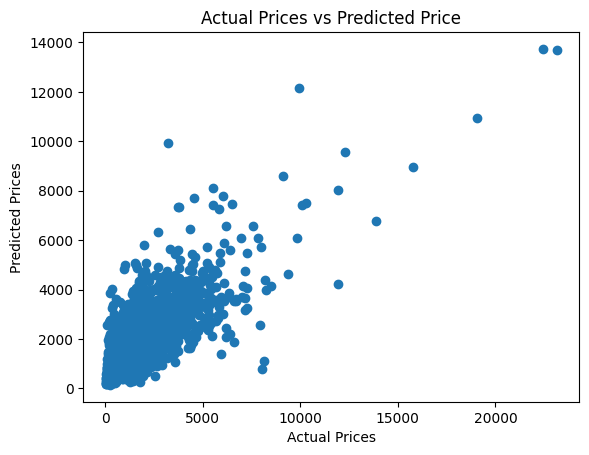

In [154]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Price")
plt.show()